<h1><center>Olympics Data Analysis</center></h1>

<h3>1. Import Dependencies</h3>

In [1]:
#import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

<h3>2. Loan Dataset</h3>

In [2]:
#athletes dataset
athlete_events_ds = pd.read_csv('dataset/athlete_events.csv')
#coaches dataset
noc_regions_ds = pd.read_csv('dataset/noc_regions.csv')

In [3]:
#check top4 rows of athlete events dataset
athlete_events_ds.head(4)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold


In [4]:
#check top4 rows of noc (national olympic committees) regions dataset
noc_regions_ds.head(4)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN


<h3>3. Exploratory Data Analysis</h3>

In [5]:
#join the dataframe
athlete_events_ds = athlete_events_ds.merge(noc_regions_ds, how='left', on='NOC')

In [6]:
#check top4 rows of athlete events dataset
athlete_events_ds.head(4)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN


In [7]:
#sample data
print("Sample: ", athlete_events_ds.shape[0])
#features data
print("Features: ", athlete_events_ds.shape[1])

Sample:  271116
Features:  17


In [8]:
#check athlete events dtype
athlete_events_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [9]:
#check statistic of athlete events
athlete_events_ds.describe(include='all')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
count,271116.000000,271116,271116,261642.000000,210945.000000,208241.000000,271116,271116,271116,271116.000000,271116,271116,271116,271116,39783,270746,5039
unique,NaN,134732,2,NaN,NaN,NaN,1184,230,51,NaN,2,42,66,765,3,205,21
top,NaN,Robert Tait McKenzie,M,NaN,NaN,NaN,United States,USA,2000 Summer,NaN,Summer,London,Athletics,Football Men's Football,Gold,USA,Yugoslavia
freq,NaN,58,196594,NaN,NaN,NaN,17847,18853,13821,NaN,222552,22426,38624,5733,13372,18853,2583
mean,68248.954396,NaN,NaN,25.556898,175.338970,70.702393,NaN,NaN,NaN,1978.378480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,39022.286345,NaN,NaN,6.393561,10.518462,14.348020,NaN,NaN,NaN,29.877632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,10.000000,127.000000,25.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,34643.000000,NaN,NaN,21.000000,168.000000,60.000000,NaN,NaN,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,68205.000000,NaN,NaN,24.000000,175.000000,70.000000,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,102097.250000,NaN,NaN,28.000000,183.000000,79.000000,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


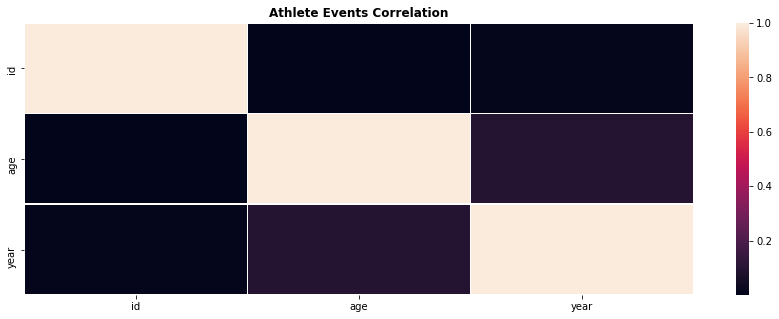

In [209]:
#draw a heatmap plot to see correlation in athlete events
athlete_correlations = athlete_events_ds.corr(method='pearson')
plt.figure(figsize=(15,5))

sns.heatmap(athlete_correlations,
           xticklabels=athlete_correlations.columns.values,
           yticklabels=athlete_correlations.columns.values,
           linecolor='white',
           linewidths=.5)
plt.title("Athlete Events Correlation",fontweight = 'bold')
plt.show()

In [11]:
#raname the feature we wanna to change lol
athlete_events_ds.rename(columns={
    'ID':'id',
    'Name':'name',
    'Sex':'gender',
    'Age':'age',
    'Height':'height',
    'Weight':'weight',
    'Team':'team',
    'NOC':'noc',
    'Games':'game',
    'Year':'year',
    'Season':'season',
    'City':'city',
    'Sport':'sport',
    'Event':'event',
    'Medal':'medal',
    'region':'region',
    'notes':'note'
}, inplace=True)

In [12]:
#check columns name in the dataframe
for col_name in athlete_events_ds.columns:
    print(col_name)

id
name
gender
age
height
weight
team
noc
game
year
season
city
sport
event
medal
region
note


In [13]:
#check null value
print("Null Values In Each Column")
athlete_events_ds.isnull().any()

Null Values In Each Column


id        False
name      False
gender    False
age        True
height     True
weight     True
team      False
noc       False
game      False
year      False
season    False
city      False
sport     False
event     False
medal      True
region     True
note       True
dtype: bool

In [14]:
#check null value
print("Null Values In Each Column")
athlete_events_ds.isnull().sum()

Null Values In Each Column


id             0
name           0
gender         0
age         9474
height     60171
weight     62875
team           0
noc            0
game           0
year           0
season         0
city           0
sport          0
event          0
medal     231333
region       370
note      266077
dtype: int64

In [15]:
#check cambodia athlete 
athlete_events_ds.query('team == "Cambodia"').head(2)

,id,name,gender,age,height,weight,team,noc,game,year,season,city,sport,event,medal,region,note
38326,19700,Chan Seyha,F,17.0,165.0,60.0,Cambodia,CAM,2012 Summer,2012,Summer,London,Athletics,Athletics Women's 200 metres,NaN,Cambodia,NaN
40063,20607,Chhay-Kheng Nhem,M,25.0,171.0,70.0,Cambodia,CAM,1972 Summer,1972,Summer,Munich,Swimming,Swimming Men's 100 metres Butterfly,NaN,Cambodia,NaN


<h3>4. Data Cleansing | Wrangling</h3>

In [16]:
athlete_events_ds.head(2)

,id,name,gender,age,height,weight,team,noc,game,year,season,city,sport,event,medal,region,note
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


In [17]:
#check Dtype in each features
athlete_events_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      271116 non-null  int64  
 1   name    271116 non-null  object 
 2   gender  271116 non-null  object 
 3   age     261642 non-null  float64
 4   height  210945 non-null  float64
 5   weight  208241 non-null  float64
 6   team    271116 non-null  object 
 7   noc     271116 non-null  object 
 8   game    271116 non-null  object 
 9   year    271116 non-null  int64  
 10  season  271116 non-null  object 
 11  city    271116 non-null  object 
 12  sport   271116 non-null  object 
 13  event   271116 non-null  object 
 14  medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  note    5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [18]:
#gender
#change dtype to string
#athlete_events_ds['gender'] = athlete_events_ds['gender'].astype(str)
#replace value in gender feature
#athlete_events_ds['gender'] = athlete_events_ds['gender'].str.replace('M', '1')
#athlete_events_ds['gender'] = athlete_events_ds['gender'].str.replace('F', '0')
#convert dtype to integer
#athlete_events_ds['gender'] = athlete_events_ds['gender'].astype(int)
#check unique values of gender
print(athlete_events_ds.gender.unique())
#check null values
print("Null Values:", athlete_events_ds.gender.isnull().sum())

['M' 'F']
Null Values: 0


In [19]:
#age
#convert to string
athlete_events_ds['age'] = athlete_events_ds['age'].astype(str)
#replace NAN by zero
athlete_events_ds['age'] = athlete_events_ds['age'].fillna('0')
#replace n by 0
athlete_events_ds['age'] = athlete_events_ds['age'].str.replace('n','0')
athlete_events_ds['age'] = athlete_events_ds['age'].str.replace('0a','0')
#select first two index
athlete_events_ds['age'] = athlete_events_ds['age'].str.slice(0,2)
#convert to int
athlete_events_ds['age'] = athlete_events_ds['age'].astype(int)
#check unique values of gender
print(athlete_events_ds.age.unique())

[24 23 34 21 25 27 31 33 18 26 22 30 32 28 54 20 17 43 47 29 41 45 49 53
 57  0 19 38 35 16 37 15 42 46 40 36 14 39 48 52 44 55 50 71 63 51 58 13
 60 75 65 56 64 68 84 12 72 59 61 70 74 62 67 69 73 66 11 76 88 96 80 10
 81 77 97]


In [20]:
#Height
#replace NAN by 0
athlete_events_ds['height'] = athlete_events_ds['height'].fillna('0')
athlete_events_ds['height'] = athlete_events_ds['height'].replace('nan','0')
#check unique values of gender
print(athlete_events_ds.height.unique())

[180.0 170.0 '0' 185.0 188.0 183.0 168.0 186.0 182.0 172.0 159.0 171.0
 184.0 175.0 189.0 176.0 163.0 187.0 169.0 174.0 190.0 194.0 177.0 167.0
 164.0 198.0 165.0 156.0 179.0 178.0 166.0 181.0 155.0 160.0 173.0 192.0
 195.0 191.0 203.0 158.0 154.0 153.0 152.0 193.0 162.0 197.0 157.0 207.0
 147.0 150.0 202.0 161.0 210.0 205.0 200.0 148.0 208.0 140.0 213.0 204.0
 151.0 196.0 146.0 201.0 132.0 149.0 199.0 211.0 215.0 139.0 206.0 135.0
 142.0 217.0 209.0 145.0 221.0 144.0 214.0 143.0 218.0 127.0 223.0 216.0
 141.0 212.0 131.0 136.0 137.0 138.0 220.0 130.0 219.0 133.0 128.0 226.0]


In [21]:
#Weight
#replace NAN by 0
#replace NAN by 0
athlete_events_ds['weight'] = athlete_events_ds['weight'].fillna('0')
athlete_events_ds['weight'] = athlete_events_ds['weight'].replace('nan','0')
#check unique values of gender
print(athlete_events_ds.weight.unique())

[80.0 60.0 '0' 82.0 75.0 72.0 96.0 76.5 70.0 55.5 65.0 85.0 64.0 130.0
 125.0 89.0 77.0 76.0 98.0 78.0 73.0 93.0 74.0 106.0 58.0 66.0 71.0 90.0
 87.0 49.0 48.0 83.0 86.0 55.0 67.0 97.0 105.0 43.0 79.0 51.0 88.0 62.0
 53.0 104.0 57.0 63.0 52.0 91.0 94.0 56.0 68.0 61.0 69.0 46.0 100.0 81.0
 92.0 120.0 95.0 59.0 50.0 117.5 54.0 47.0 117.0 84.0 102.0 40.0 115.0
 110.0 45.0 99.0 109.0 69.5 135.0 38.0 77.5 103.0 163.0 113.0 42.0 91.5
 82.5 68.5 116.0 107.0 96.5 83.5 44.0 122.0 102.5 71.5 156.0 150.0 160.0
 95.5 101.0 146.0 138.0 112.0 108.0 140.0 141.0 63.5 114.0 118.0 52.5
 127.0 39.0 73.5 155.0 74.5 32.0 143.0 133.0 70.5 126.0 53.5 121.0 67.5
 111.0 123.5 41.0 36.0 132.0 128.0 65.5 98.5 124.0 59.5 66.5 127.5 35.0
 144.0 58.5 214.0 81.5 37.0 146.5 116.5 148.0 123.0 89.5 133.5 86.5 85.5
 101.5 154.0 139.0 57.5 136.0 54.5 137.0 170.0 30.0 25.0 77.3333333333333
 131.0 79.5 34.0 119.0 134.0 33.0 109.5 90.5 129.0 147.0 56.5 78.5 165.0
 88.5 62.5 60.5 158.0 75.5 190.0 64.5 145.0 121.5 61.5 161.0 

In [22]:
#Team
print("Null Values - TEAM: ", athlete_events_ds.team.isnull().sum())
print("Data Type - TEAM: ", athlete_events_ds.team.dtype)

Null Values - TEAM:  0
Data Type - TEAM:  object


In [23]:
#NOC
#if null, fill by zero
athlete_events_ds['noc'] = athlete_events_ds['noc'].fillna('0') 
#Check unique values
athlete_events_ds['noc'].unique()

array(['CHN', 'DEN', 'NED', 'USA', 'FIN', 'NOR', 'ROU', 'EST', 'FRA',
       'MAR', 'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD',
       'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'FRG', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'ISV',
       'SRI', 'ARM', 'CIV', 'KEN', 'BEN', 'UKR', 'GBR', 'GHA', 'SOM',
       'LAT', 'NIG', 'MLI', 'AFG', 'POL', 'CRC', 'PAN', 'GEO', 'SLO',
       'CRO', 'GUY', 'NZL', 'POR', 'PAR', 'ANG', 'VEN', 'COL', 'BAN',
       'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY',
       'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM',
       'LBR', 'SUR',

In [24]:
#Game
#drop game feature
athlete_events_ds.drop(['game'], axis=1, inplace=True)

In [25]:
#YEAR
#NOT NULL
print(athlete_events_ds.year.unique())

[1992 2012 1920 1900 1988 1994 1932 2002 1952 1980 2000 1996 1912 1924
 2014 1948 1998 2006 2008 2016 2004 1960 1964 1984 1968 1972 1936 1956
 1928 1976 2010 1906 1904 1908 1896]


In [26]:
#SEASON
#check null
print("NULL values: ", athlete_events_ds.season.isnull().any())

#Change data type to string
athlete_events_ds['season'] = athlete_events_ds['season'].astype(str)
#replace by
# Summer = 0
#Winter = 1
athlete_events_ds['season'] = athlete_events_ds['season'].str.replace('Summer','S')
athlete_events_ds['season'] = athlete_events_ds['season'].str.replace('Winter','W')
#Convert to interger back
#athlete_events_ds['season'] = athlete_events_ds['season'].astype(int)
#check uniqu value again
print(athlete_events_ds.season.unique())

NULL values:  False
['S' 'W']


In [27]:
#CITY
print(athlete_events_ds.city.unique())
#Fill zero if NULL
athlete_events_ds['city'] = athlete_events_ds['city'].fillna('0')
#re-check null agian
print("NULL value: ", athlete_events_ds.city.isnull().sum())

['Barcelona' 'London' 'Antwerpen' 'Paris' 'Calgary' 'Albertville'
 'Lillehammer' 'Los Angeles' 'Salt Lake City' 'Helsinki' 'Lake Placid'
 'Sydney' 'Atlanta' 'Stockholm' 'Sochi' 'Nagano' 'Torino' 'Beijing'
 'Rio de Janeiro' 'Athina' 'Squaw Valley' 'Innsbruck' 'Sarajevo'
 'Mexico City' 'Munich' 'Seoul' 'Berlin' 'Oslo' "Cortina d'Ampezzo"
 'Melbourne' 'Roma' 'Amsterdam' 'Montreal' 'Moskva' 'Tokyo' 'Vancouver'
 'Grenoble' 'Sapporo' 'Chamonix' 'St. Louis' 'Sankt Moritz'
 'Garmisch-Partenkirchen']
NULL value:  0


In [28]:
#SPORT
print(athlete_events_ds.sport.unique())
#Fill zero if NULL
athlete_events_ds['sport'] = athlete_events_ds['sport'].fillna('0')
#re-check null agian
print("NULL value: ", athlete_events_ds.sport.isnull().sum())

['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']
NULL value:  0


In [29]:
#EVENT
#Check null
print("NULL values:", athlete_events_ds.event.isnull().sum())

NULL values: 0


In [30]:
#MEDAL
#check 0 if nan
athlete_events_ds['medal'] = athlete_events_ds['medal'].fillna('0') 
#Convert to string first
athlete_events_ds['medal'] = athlete_events_ds['medal'].astype(str)
#replace the value
#Gold: 1, Silver:2, Bronze: 3
athlete_events_ds['medal'] = athlete_events_ds['medal'].str.replace('Gold', 'G')
athlete_events_ds['medal'] = athlete_events_ds['medal'].str.replace('Silver', 'S')
athlete_events_ds['medal'] = athlete_events_ds['medal'].str.replace('Bronze', 'B')

#re-convert to interger
#athlete_events_ds['medal'] = athlete_events_ds['medal'].astype(int)

#check number of null
print("NULL VALUES:", athlete_events_ds.medal.isnull().sum())
#check unique values
print(athlete_events_ds.medal.unique())

NULL VALUES: 0
['0' 'G' 'B' 'S']


In [31]:
#REGION
#Check null
print("NULL values:", athlete_events_ds.region.isnull().sum())
#check 0 if nan
athlete_events_ds['region'] = athlete_events_ds['region'].fillna('0') 
#check unique values
print(athlete_events_ds.region.unique())

NULL values: 370
['China' 'Denmark' 'Netherlands' 'USA' 'Finland' 'Norway' 'Romania'
 'Estonia' 'France' 'Morocco' 'Spain' 'Egypt' 'Iran' 'Bulgaria' 'Italy'
 'Chad' 'Azerbaijan' 'Sudan' 'Russia' 'Argentina' 'Cuba' 'Belarus'
 'Greece' 'Cameroon' 'Turkey' 'Chile' 'Mexico' 'Nicaragua' 'Hungary'
 'Nigeria' 'Algeria' 'Kuwait' 'Bahrain' 'Pakistan' 'Iraq' 'Syria'
 'Lebanon' 'Qatar' 'Malaysia' 'Germany' 'Canada' 'Ireland' 'Australia'
 'South Africa' 'Eritrea' 'Tanzania' 'Jordan' 'Tunisia' 'Libya' 'Belgium'
 'Djibouti' 'Palestine' 'Comoros' 'Kazakhstan' 'Brunei' 'India'
 'Saudi Arabia' 'Maldives' 'Ethiopia' 'United Arab Emirates' 'Yemen'
 'Indonesia' 'Philippines' '0' 'Uzbekistan' 'Kyrgyzstan' 'Tajikistan'
 'Japan' 'Republic of Congo' 'Switzerland' 'Brazil' 'Monaco' 'Israel'
 'Uruguay' 'Sweden' 'Virgin Islands, US' 'Sri Lanka' 'Armenia'
 'Ivory Coast' 'Kenya' 'Benin' 'Ukraine' 'UK' 'Ghana' 'Somalia' 'Latvia'
 'Niger' 'Mali' 'Afghanistan' 'Poland' 'Costa Rica' 'Panama' 'Georgia'
 'Slovenia' 'Cro

In [32]:
#NOTE
#replace nan by o
athlete_events_ds['note'] = athlete_events_ds['note'].fillna('0')
#Check note
print("NULL values:", athlete_events_ds.note.isnull().sum())

NULL values: 0


In [33]:
#check hole dataframe
athlete_events_ds.head(4)
#DONE on DATA CLEANSING

,id,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal,region,note
0,1,A Dijiang,M,24,180,80,China,CHN,1992,S,Barcelona,Basketball,Basketball Men's Basketball,0,China,0
1,2,A Lamusi,M,23,170,60,China,CHN,2012,S,London,Judo,Judo Men's Extra-Lightweight,0,China,0
2,3,Gunnar Nielsen Aaby,M,24,0,0,Denmark,DEN,1920,S,Antwerpen,Football,Football Men's Football,0,Denmark,0
3,4,Edgar Lindenau Aabye,M,34,0,0,Denmark/Sweden,DEN,1900,S,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,G,Denmark,0


<h3>5. Data Analysis</h3>

In [50]:
#create a table 
gender_table = athlete_events_ds.groupby(['gender','year']).size().reset_index().pivot(columns='gender', 
                                                                        index='year', values=0).reset_index()

In [208]:
x = gender_table["year"]
y1 = gender_table['F']
y2 = gender_table['M']

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x = x, y = y1, mode = "lines+markers", name = "Female",
        line=dict(color='Blue', width=2)), secondary_y=False,)
fig.add_trace(go.Scatter(x = x, y = y2, mode = "lines+markers", name = "Male",
        line=dict(color='Orange', width=2)), secondary_y=True,)

# Add figure title
fig.update_layout(title_text="Number of men and women athelete over time")

# Set x-axis title
fig.update_layout(title="Variation in count of MALE and FEMALE players",xaxis_title = "year")

# Set y-axes titles
fig.update_yaxes(title_text="Female", secondary_y=False)
fig.update_yaxes(title_text="Male", secondary_y=True)
fig.show()

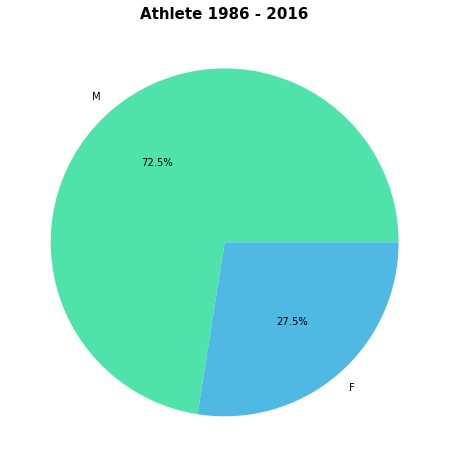

In [206]:
#Total Athletes Male and Female gender 
gender_number = athlete_events_ds['gender'].value_counts()
label = athlete_events_ds['gender'].unique()
plt.figure(figsize=(15,8))
plt.pie(gender_number, labels=label,autopct='%1.1f%%', colors=['#4FE3AB', '#4FB8E3'])
plt.title('Athlete 1986 - 2016', fontsize='15',fontweight = 'bold')
plt.show()

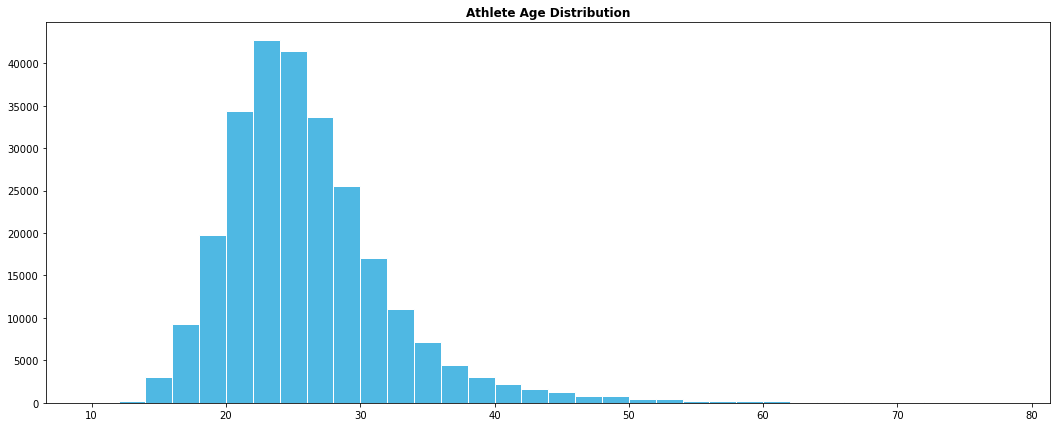

In [205]:
#Athletes Age Distribution 
plt.figure(figsize=(18,7))
#Histogram plot
plt.hist(athlete_events_ds.age, bins=np.arange(10, 80, 2), color='#4FB8E3', ec='white')
plt.title("Athlete Age Distribution",fontweight = 'bold')
plt.show()

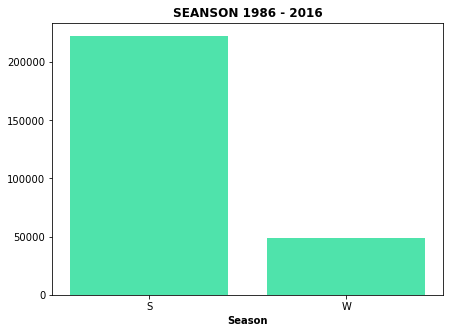

In [204]:
#season 1986 - 2016
plt.figure(figsize=(7,5))
plt.bar(athlete_events_ds.season.unique(), athlete_events_ds.season.value_counts(), color='#4FE3AB')
plt.title("SEANSON 1986 - 2016",fontweight = 'bold')
plt.xlabel("Season",fontweight = 'bold')
plt.show()

In [61]:
#women_olympics summer
women_olympic_summer = athlete_events_ds[(athlete_events_ds.gender == 'F') & (athlete_events_ds.season == 'S')]
men_olympic_summer = athlete_events_ds[(athlete_events_ds.gender == 'M') & (athlete_events_ds.season == 'S')]

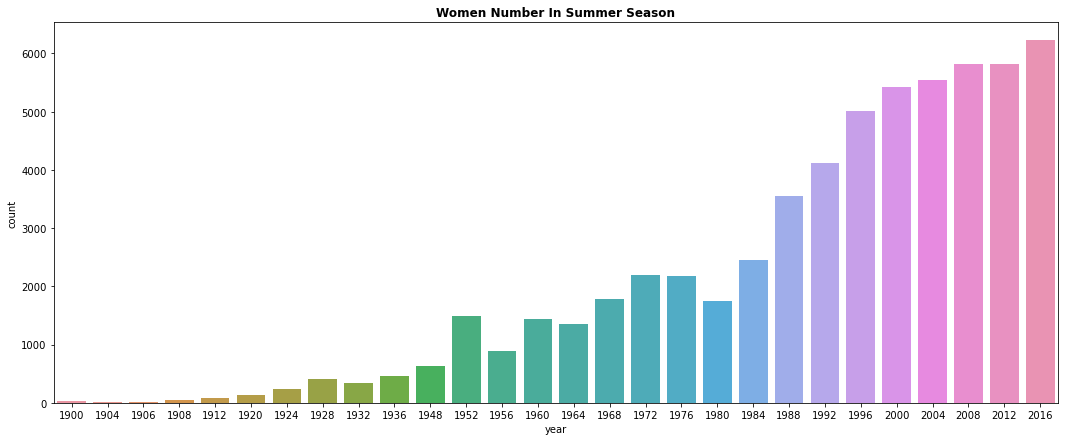

In [203]:
plt.figure(figsize=(18,7))
sns.countplot(x='year', data=women_olympic_summer)
plt.title("Women Number In Summer Season",fontweight = 'bold')
plt.show()

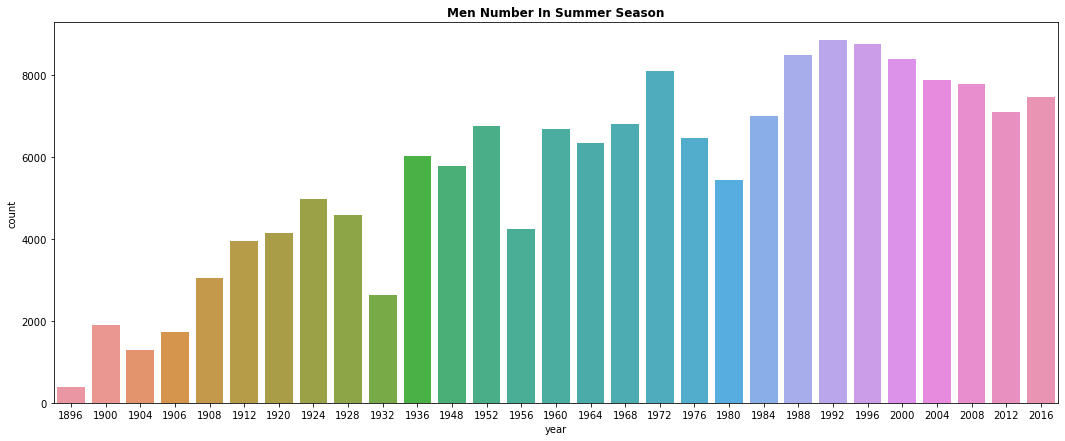

In [202]:
plt.figure(figsize=(18,7))
sns.countplot(x='year', data=men_olympic_summer)
plt.title("Men Number In Summer Season",fontweight = 'bold')
plt.show()

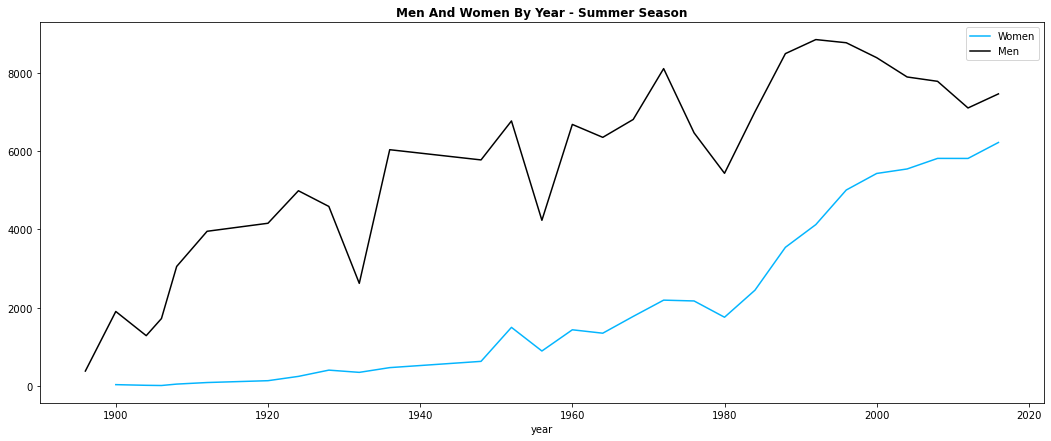

In [201]:
women_s = women_olympic_summer.groupby(by='year')['gender'].value_counts()
men_s = men_olympic_summer.groupby(by='year')['gender'].value_counts()
plt.figure(figsize=(18,7))
women_s.loc[:,'F'].plot(color='#04B5FE')
men_s.loc[:,'M'].plot(color='black')
plt.title("Men And Women By Year - Summer Season",fontweight = 'bold')
plt.legend(['Women', 'Men'])
plt.show()

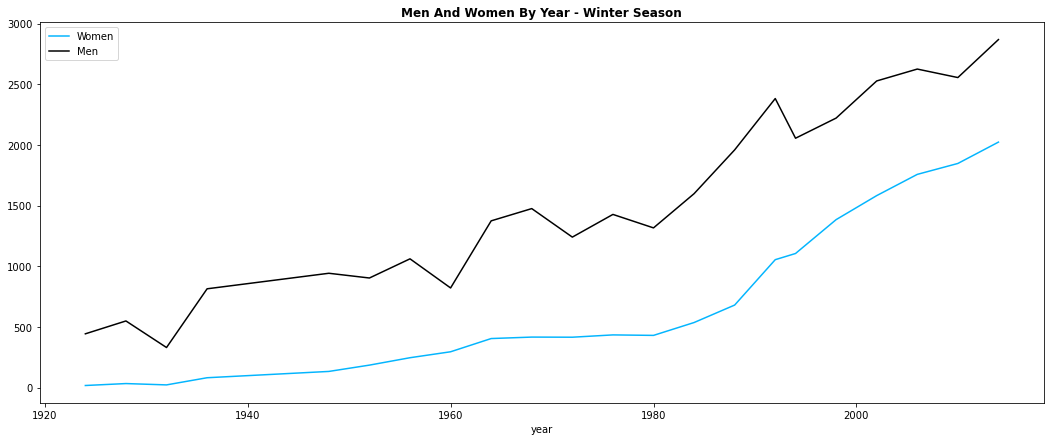

In [200]:
#women_olympics
women_olympic_winter = athlete_events_ds[(athlete_events_ds.gender == 'F') & (athlete_events_ds.season == 'W')]
men_olympic_winter = athlete_events_ds[(athlete_events_ds.gender == 'M') & (athlete_events_ds.season == 'W')]

women_winter = women_olympic_winter.groupby(by='year')['gender'].value_counts()
men_winter = men_olympic_winter.groupby(by='year')['gender'].value_counts()
plt.figure(figsize=(18,7))
women_winter.loc[:,'F'].plot(color='#04B5FE')
men_winter.loc[:,'M'].plot(color='black')
plt.legend(['Women', 'Men'])
plt.title("Men And Women By Year - Winter Season",fontweight = 'bold')
plt.show()

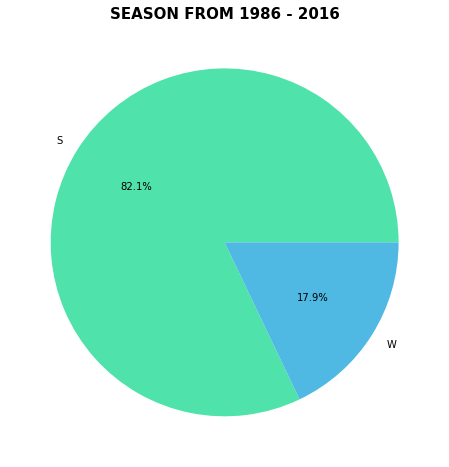

In [199]:
#Total Athletes Male and Female gender 
season_number = athlete_events_ds['season'].value_counts()
label = athlete_events_ds['season'].unique()
plt.figure(figsize=(15,8))
plt.pie(season_number, labels=label,autopct='%1.1f%%', colors=['#4FE3AB', '#4FB8E3'])
plt.title('SEASON FROM 1986 - 2016', fontsize='15',fontweight = 'bold')
plt.show()

In [86]:
# season by sport
winter_sport = athlete_events_ds[athlete_events_ds.season == 'W'].sport.unique()
summer_sport = athlete_events_ds[athlete_events_ds.season == 'S'].sport.unique()
print("*" * 25, "WINTER SEASON","*" * 25)
for i,j in enumerate(winter_sport):
    print(i, j)

print("*" * 25, "SUMMER SEASON","*" * 25)
for i,j in enumerate(summer_sport):
    print(i, j)


************************* WINTER SEASON *************************
0 Speed Skating
1 Cross Country Skiing
2 Ice Hockey
3 Biathlon
4 Alpine Skiing
5 Luge
6 Bobsleigh
7 Figure Skating
8 Nordic Combined
9 Freestyle Skiing
10 Ski Jumping
11 Curling
12 Snowboarding
13 Short Track Speed Skating
14 Skeleton
15 Military Ski Patrol
16 Alpinism
************************* SUMMER SEASON *************************
0 Basketball
1 Judo
2 Football
3 Tug-Of-War
4 Athletics
5 Swimming
6 Badminton
7 Sailing
8 Gymnastics
9 Art Competitions
10 Handball
11 Weightlifting
12 Wrestling
13 Water Polo
14 Hockey
15 Rowing
16 Fencing
17 Equestrianism
18 Shooting
19 Boxing
20 Taekwondo
21 Cycling
22 Diving
23 Canoeing
24 Tennis
25 Modern Pentathlon
26 Golf
27 Softball
28 Archery
29 Volleyball
30 Synchronized Swimming
31 Table Tennis
32 Baseball
33 Rhythmic Gymnastics
34 Rugby Sevens
35 Trampolining
36 Beach Volleyball
37 Triathlon
38 Rugby
39 Lacrosse
40 Polo
41 Cricket
42 Ice Hockey
43 Racquets
44 Motorboating
45 Cro

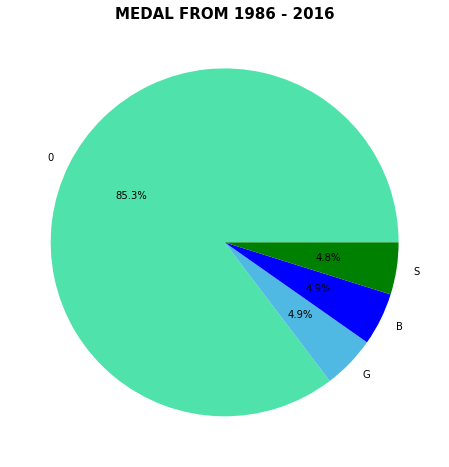

************************* MEDAL NUMBER *************************
0    231333
G     13372
B     13295
S     13116
Name: medal, dtype: int64


In [197]:
#Total Athletes Male and Female gender 
#count medal number of athletes
medal_number = athlete_events_ds.medal.value_counts()
label = athlete_events_ds['medal'].unique()
plt.figure(figsize=(18,8))
plt.pie(medal_number, labels=label,autopct='%1.1f%%', colors=['#4FE3AB', '#4FB8E3','blue', 'green'])
plt.title('MEDAL FROM 1986 - 2016', fontsize='15',fontweight = 'bold')
plt.show()
print("*" * 25, "MEDAL NUMBER","*" * 25)
print(medal_number)

In [151]:
#check gold medal in 2016
olympic_max_year = athlete_events_ds.year.max()
team_names_gold = athlete_events_ds[(athlete_events_ds.year == olympic_max_year) & (athlete_events_ds.medal == 'G')].team
team_names_silver = athlete_events_ds[(athlete_events_ds.year == olympic_max_year) & (athlete_events_ds.medal == 'S')].team
team_names_bronze = athlete_events_ds[(athlete_events_ds.year == olympic_max_year) & (athlete_events_ds.medal == 'B')].tea

175            France
794            Russia
796            Russia
1228      Netherlands
1529      New Zealand
             ...     
268944          China
269163     Kazakhstan
269352         Russia
270111         Serbia
270370         Serbia
Name: team, Length: 655, dtype: object

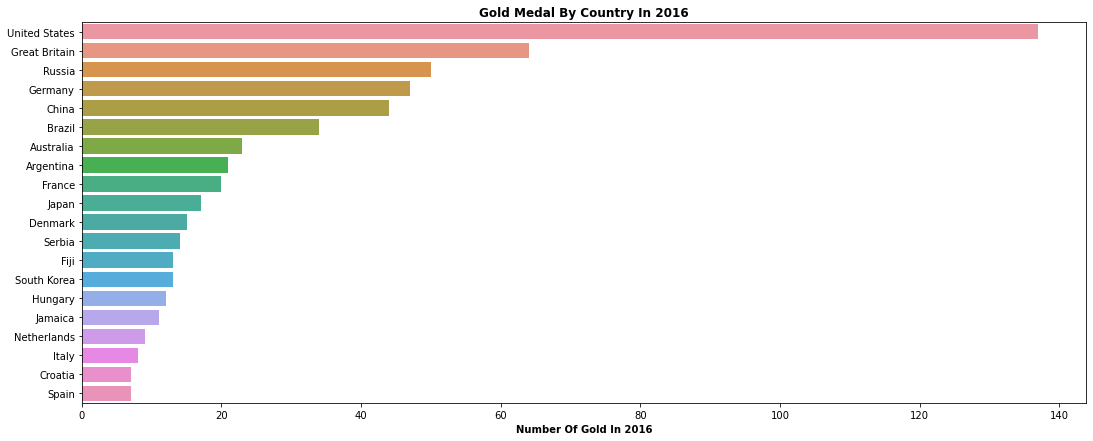

In [196]:
#top ten countries of gold medal in 2016
plt.figure(figsize=(18,7))
sns.barplot(x=team_names_gold.value_counts().head(20),
             y=team_names_gold.value_counts().head(20).index)
plt.ylabel(None)
plt.title("Gold Medal By Country In 2016",fontweight = 'bold')
plt.xlabel("Number Of Gold In 2016",fontweight = 'bold')
plt.show()

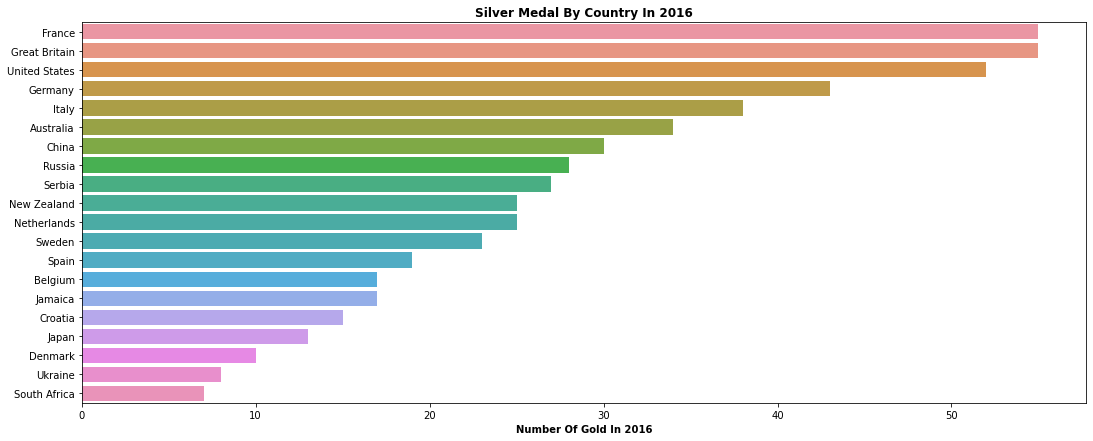

In [195]:
#top ten countries of silver medal in 2016
plt.figure(figsize=(18,7))
sns.barplot(x=team_names_silver.value_counts().head(20),
             y=team_names_silver.value_counts().head(20).index)
plt.ylabel(None)
plt.title("Silver Medal By Country In 2016",fontweight = 'bold')
plt.xlabel("Number Of Gold In 2016",fontweight = 'bold')
plt.show()

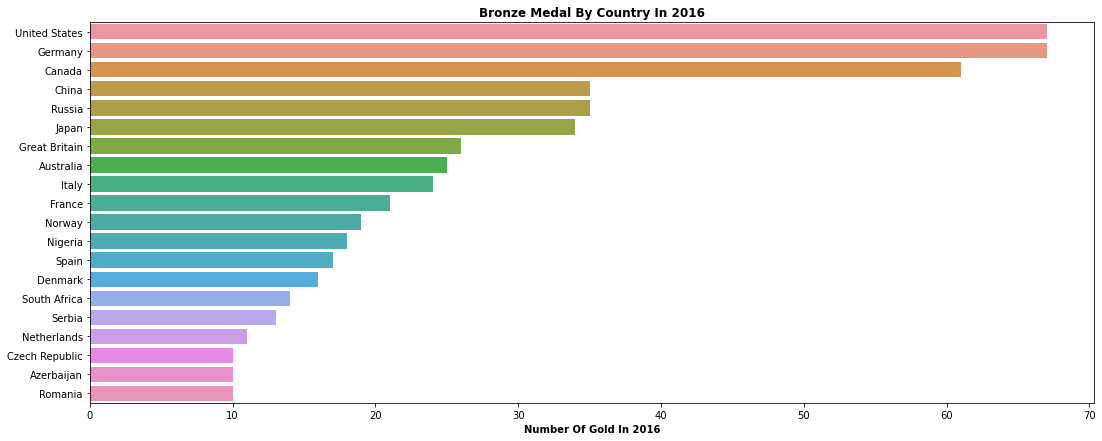

In [194]:
#top ten countries of silver medal in 2016
plt.figure(figsize=(18,7))
sns.barplot(x=team_names_bronze.value_counts().head(20),
             y=team_names_bronze.value_counts().head(20).index)
plt.ylabel(None)
plt.title("Bronze Medal By Country In 2016",fontweight = 'bold')
plt.xlabel("Number Of Gold In 2016",fontweight = 'bold')
plt.show()

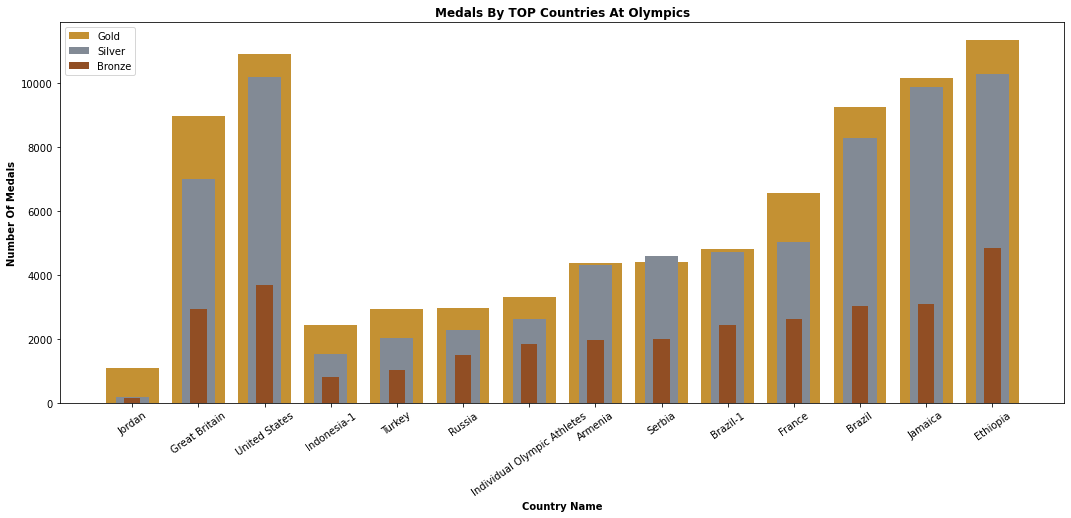

In [248]:
#Top Countries won gold medal
plt.figure(figsize = (18,7))
plt.bar(team_names_gold.values[0:21].sort_,team_names_gold.index[0:21], color = '#C49133', label = 'Gold',)
plt.bar( team_names_gold.values[0:21],team_names_silver.index[0:21], width=0.5,color = '#828A95', label = 'Silver')
plt.bar(team_names_gold.values[0:21], team_names_bronze.index[0:21],width=0.25, color = '#914E24', label = 'Bronze')
plt.title('Medals By TOP Countries At Olympics', fontweight = 'bold')
plt.xlabel('Country Name', fontweight = 'bold')
plt.ylabel('Number Of Medals',fontweight = 'bold')
plt.legend()
plt.xticks(rotation=35)
plt.show()

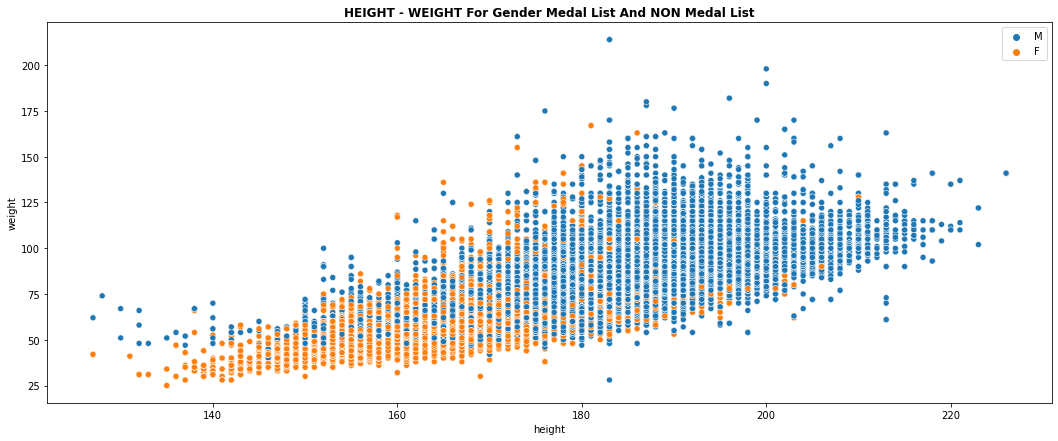

In [193]:
#for who has won the medal
medal_list = athlete_events_ds[(athlete_events_ds.height != '0') & (athlete_events_ds.weight != '0')]
plt.figure(figsize=(18,7))
axis = sns.scatterplot(x='height', y='weight', data=medal_list, hue='gender')
plt.legend()
plt.title("HEIGHT - WEIGHT For Gender Medal List And NON Medal List" ,fontweight = 'bold')
plt.show()

<h3>Cambodia Olympic Data Analysis</h3>

In [250]:
#fetch only cambodia athlete
cambodia_athletes = athlete_events_ds[athlete_events_ds.team == 'Cambodia']
cambodia_athletes.head(2)

,id,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal,region,note
38326,19700,Chan Seyha,F,17,165,60,Cambodia,CAM,2012,S,London,Athletics,Athletics Women's 200 metres,0,Cambodia,0
40063,20607,Chhay-Kheng Nhem,M,25,171,70,Cambodia,CAM,1972,S,Munich,Swimming,Swimming Men's 100 metres Butterfly,0,Cambodia,0


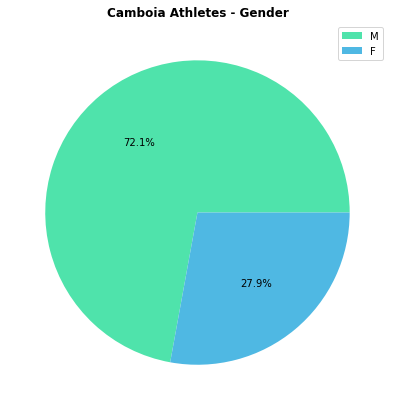

************************* Cambodia Gender Number *************************
Cambodia Men Athletes: 44
Cambodia Women Athletes 17


In [240]:
#plot cambodia athlete gender
cam_gender = cambodia_athletes.gender.value_counts()
label = cambodia_athletes['gender'].unique()
plt.figure(figsize=(18,7))
plt.pie(cam_gender,autopct='%1.1f%%' ,colors=['#4FE3AB', '#4FB8E3'])
plt.title("Camboia Athletes - Gender", fontweight='bold')
plt.legend(['M','F'])
plt.show()
cam_men_number = cambodia_athletes[cambodia_athletes.gender == 'M']
cam_women_number = cambodia_athletes[cambodia_athletes.gender == 'F']
print("*" * 25, "Cambodia Gender Number", "*" * 25)
print("Cambodia Men Athletes:", len(cam_men_number))
print("Cambodia Women Athletes", len(cam_women_number))

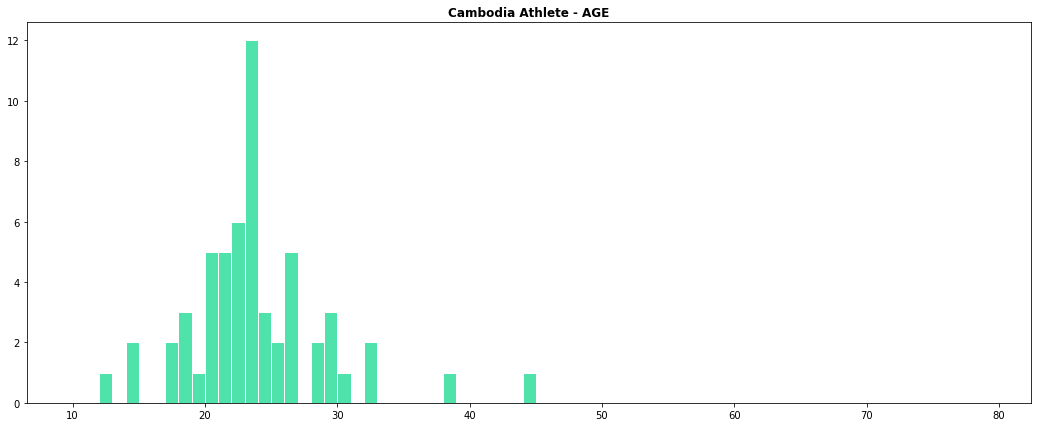

In [247]:
#cambodia athlete age 
plt.figure(figsize=(18,7))
plt.hist(cambodia_athletes.age, bins=np.arange(10,80,1), ec='white', color='#4FE3AB')
plt.title("Cambodia Athlete - AGE", fontweight='bold')
plt.show()

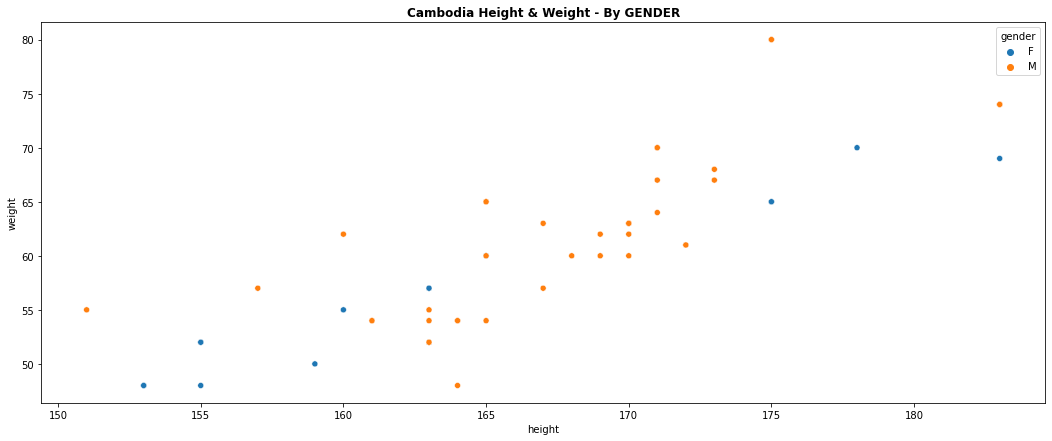

In [262]:
#cambodia medal list
plt.figure(figsize=(18,7))
cam_height_weight = cambodia_athletes[(cambodia_athletes.height != '0') & (cambodia_athletes.weight != '0')]
sns.scatterplot(x='height', y='weight', data=cam_height_weight, markers=True, hue='gender')
plt.title("Cambodia Height & Weight - By GENDER", fontweight='bold')
plt.show()

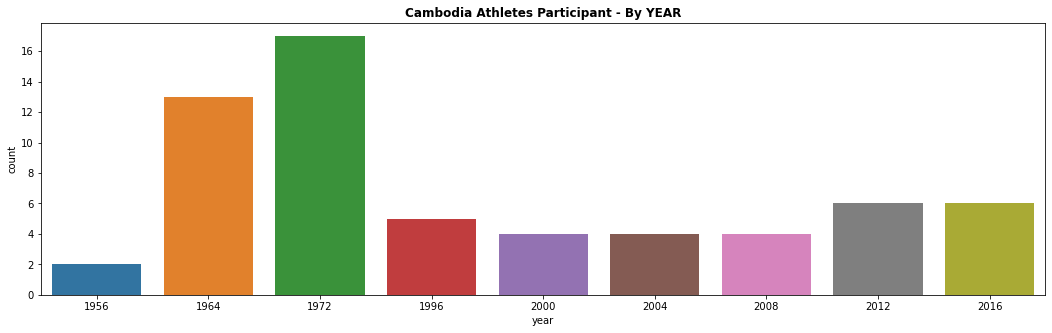

In [257]:
plt.figure(figsize=(18,5))
sns.countplot(x='year', data=cambodia_athletes)
plt.title('Cambodia Athletes Participant - By YEAR', fontweight='bold')
plt.show()

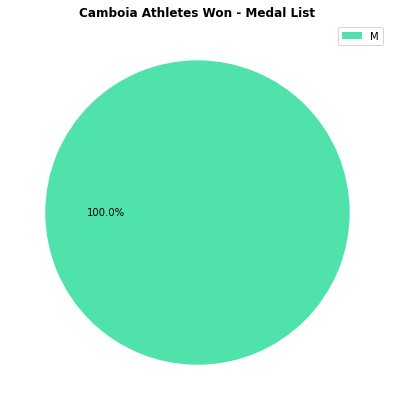

Cambodia Athletes Number Won Medal From 1956 - 2016:  1 Athlete


In [271]:
cam_medal_list = cambodia_athletes.medal.value_counts()
labels = cambodia_athletes['medal'].unique()
plt.figure(figsize=(18,7))
plt.pie(cam_medal_list,autopct='%1.1f%%' ,colors=['#4FE3AB', '#4FB8E3'])
plt.title("Camboia Athletes Won - Medal List", fontweight='bold')
plt.legend(['M','F'])
plt.show()
print("Cambodia Athletes Number Won Medal From 1956 - 2016: ",len(cam_medal_list), "Athlete")